# Uncertainty Experiment Evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
file_proactive = "n1_UncertaintyProactiveExperiment_2022-01-12_05-09-24.csv"
file_predictive = "n1_UncertaintyPredictiveExperiment_2022-01-12_07-38-59.csv"


In [3]:
df_proactive_frame = pd.read_csv(file_proactive).drop(['robustness', 'robustness_uncertainty', 'robustness_measure'], axis=1)
df_proactive_frame['makespan_std'] = df_proactive_frame['makespan'] - df_proactive_frame['makespan-optimum']
df_proactive_frame['makespan_uncertainty_std'] = df_proactive_frame['makespan_uncertainty'] - df_proactive_frame['makespan-optimum']
list_ordering = {"RandomSolver": 0, "HillClimbing": 1, "TabuSearch": 2, "SimulatedAnnealing": 3, "GeneticAlgorithm": 4}
df_proactive_frame["solver"] = pd.Categorical(df_proactive_frame["solver"], categories=list_ordering)
df_proactive_frame.head(20)

NameError: name 'file' is not defined

In [ ]:
df_grouped = df_proactive_frame.groupby(['uncertainty_percentage'])
df_grouped_solver_iterations = df_proactive_frame.groupby(['uncertainty_percentage', 'solver', 'iterations'])['makespan_uncertainty_std']

list = []
df_grouped_solver_iterations.apply(lambda df: list.append(df))
freiheitsgrad = len(list) - 1
print("Freiheitsgrad:", freiheitsgrad)

stats.kruskal(*list)

Freiheitsgrad: 79


KruskalResult(statistic=616076.9334072829, pvalue=0.0)

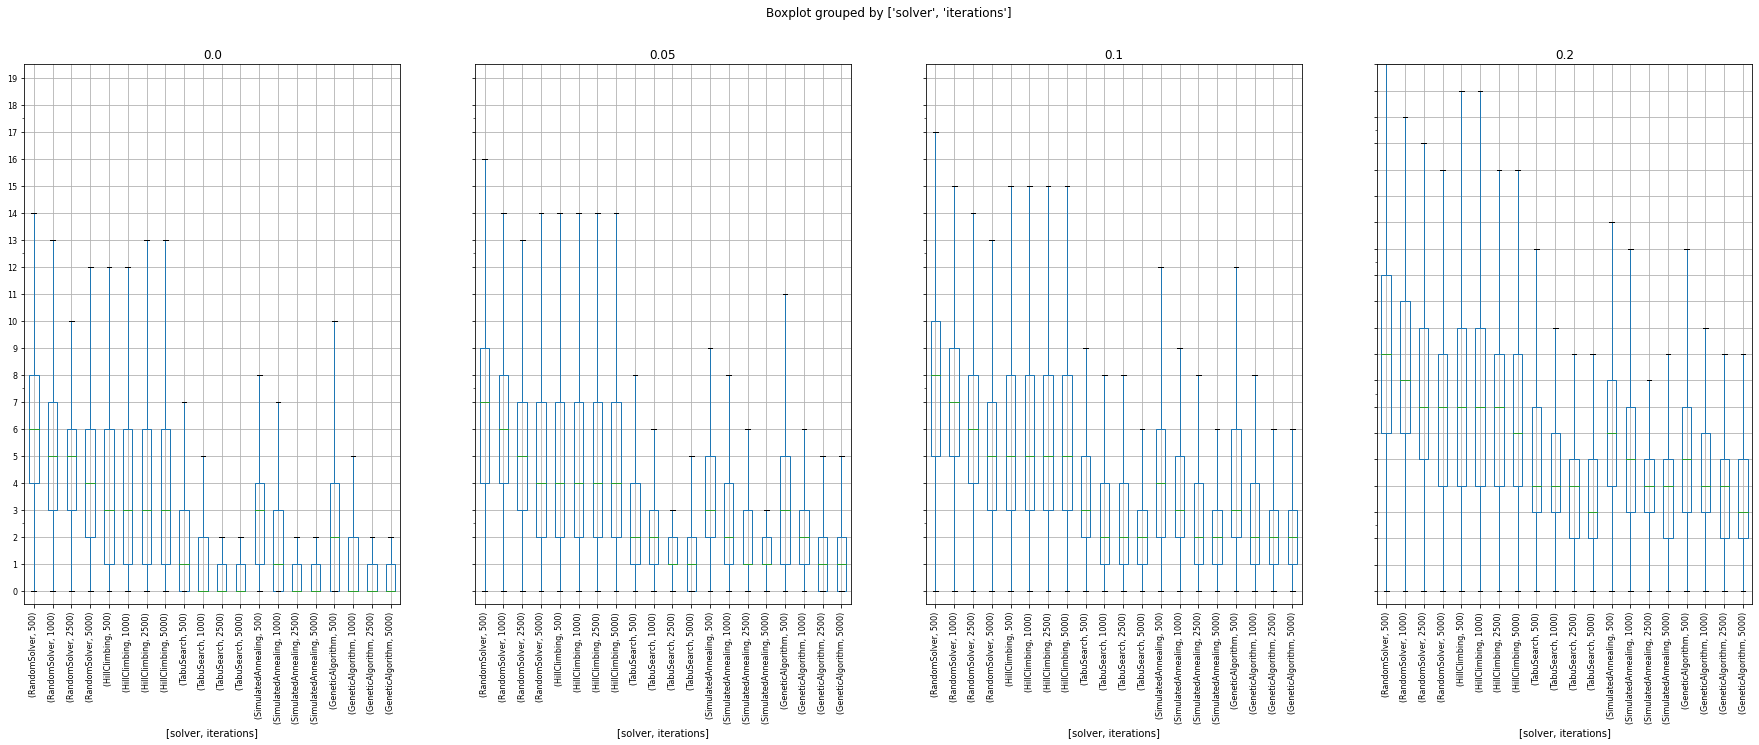

In [ ]:
boxplot = df_grouped.boxplot(column="makespan_uncertainty_std", by=['solver', 'iterations'], showfliers=False, rot=90, fontsize=8, figsize=(30, 10), layout=(1, 4))
plt.ylim(-0.5, 19.5)
plt.yticks(np.arange(0, 20.5, step=1))
plt.show()